# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
data["plot"] = True

data['sema_len']        = 3000
data['lema_len']        = 30000

data['tp_flag']                 = 'simple'
data['stop_loss_pip']           = -0.0010
data['simple_tp']               = 0.0011

# data['tp_flag']                 = 'trail'
# data['pl_move_trail_trigger']   = 0.0032
# data['pl_move_trail_size']      = 0.98
# data['pl_loss_trail_trigger']   = -0.0030
# data['pl_loss_trail_size']      = 1.02

data['max_one_stop_fraction'] = 0.5

data['start_date'] = {'year':2021, 'month':1, 'date':1}
data['end_date']   = {'year':2021, 'month':1, 'date':5}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 90%|█████████████████████████████▋   | 189350/210574 [20:13<03:10, 111.61it/s]

pls    0.00001
dtype: float64
--------------------------------------
                  date ord_types          close_type      pls
0  2021-01-04 13:44:48     short    simple_stop_loss -0.00100
1  2021-01-04 13:46:53      long  simple_take_profit  0.00111
2  2021-01-04 15:07:31      long    simple_stop_loss -0.00100
3  2021-01-04 15:08:15     short  simple_take_profit  0.00113
4  2021-01-05 01:15:37     short    simple_stop_loss -0.00100
5  2021-01-05 01:16:43      long  simple_take_profit  0.00110
6  2021-01-05 08:12:34     short    simple_stop_loss -0.00100
7  2021-01-05 08:17:31      long  simple_take_profit  0.00111
8  2021-01-05 13:55:59      long    simple_stop_loss -0.00100
9  2021-01-05 14:01:11     short       one_stop_save  0.00045
10 2021-01-05 16:33:40     short    simple_stop_loss -0.00101
11 2021-01-05 16:33:40      long  simple_take_profit  0.00112


100%|█████████████████████████████████| 210574/210574 [22:50<00:00, 153.64it/s]

Wall time: 22min 58s


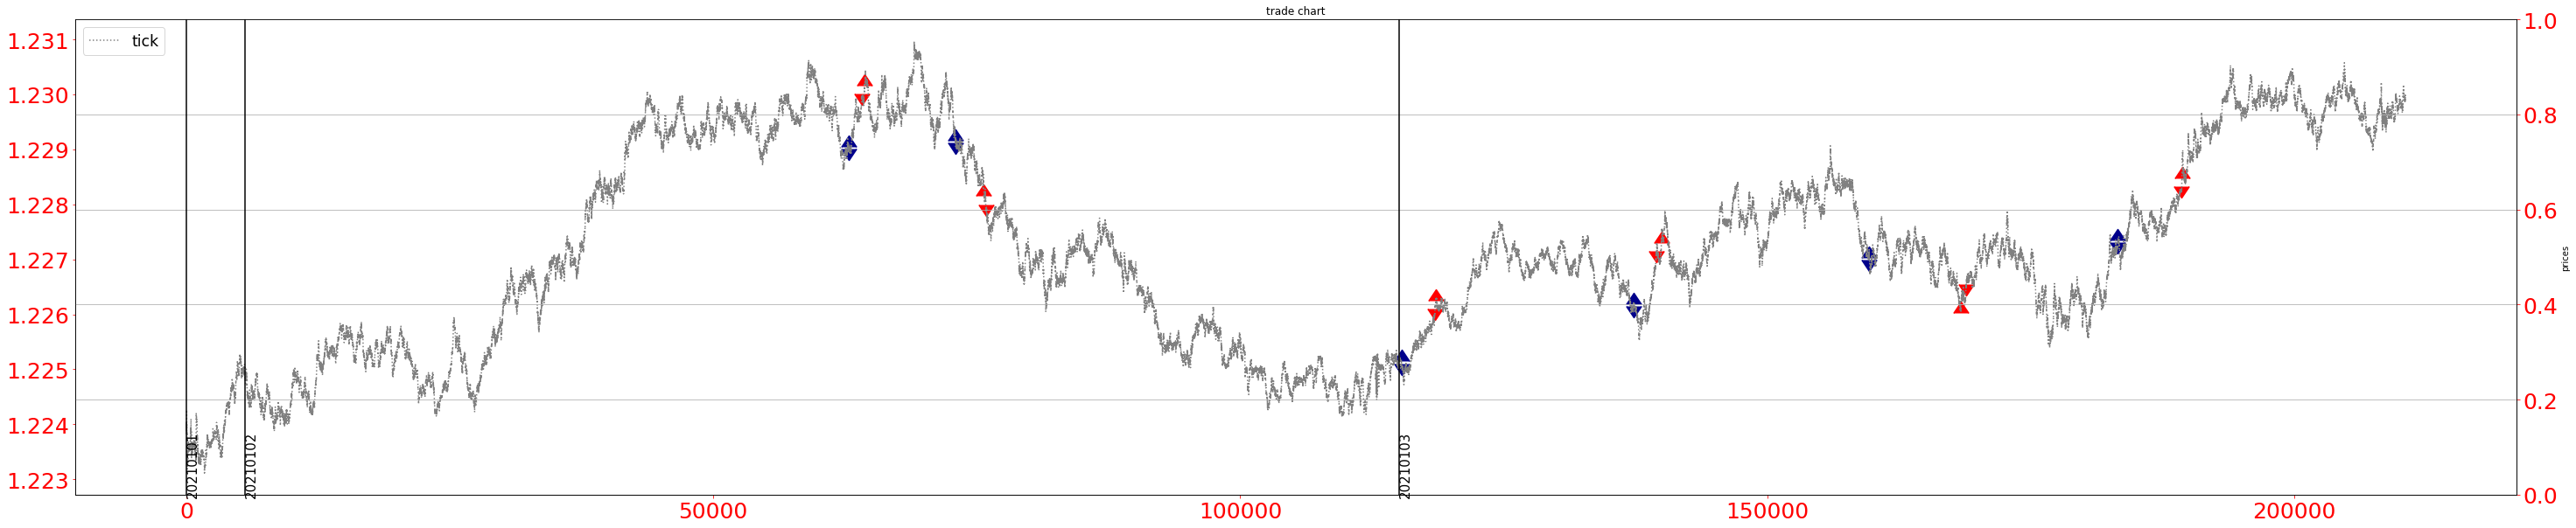

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104', '20210105']
Total PL : 1.0000000000000026e-05
-------------
net_pl            : 1e-05/0.01203
-------------
+ve               : num= 6    sum= +0.00602    avg= +0.001
-ve               : num= 6    sum= -0.00601    avg= -0.001
-----------------------------------------------------
date_val
4    0.00024
5   -0.00023
Name: pls, dtype: float64
-----------------------------------------------------
-0.00100    5
 0.00111    2
 0.00045    1
 0.00113    1
 0.00112    1
-0.00101    1
 0.00110    1
Name: pls, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['date_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['pls'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)